# **Exploratory Data Analysis**


In this module we will work with the cleaned dataset from the previous module.

Here we will perform the task of exploratory data analysis.
We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


1.   Identify the distribution of data in the dataset.

2.   Identify outliers in the dataset.

3.   Remove outliers from the dataset.

4.   Identify correlation between features in the dataset.


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## 1. Distribution of data


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


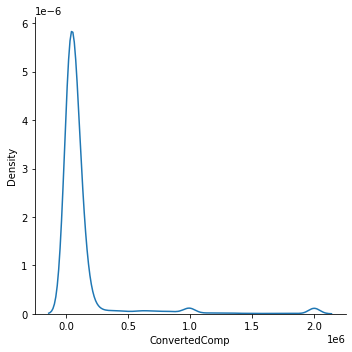

In [4]:
sns.displot(data=df, x='ConvertedComp',kind='kde')

Plot the histogram for the column `ConvertedComp`.


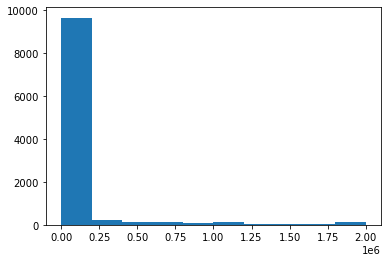

In [5]:
plt.hist(df['ConvertedComp'])
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
df[df['Gender']=='Man'].shape[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the **five number summary** for the column `Age`?


In [9]:
import numpy as np

# 1st quartile
def q1(column):
    return column.quantile(0.25)

# 3rd quartile
def q3(column):
    return column.quantile(0.75)

df['Age'].agg([min,q1,np.median,q3,max])

min       16.0
q1        25.0
median    29.0
q3        35.0
max       99.0
Name: Age, dtype: float64

or we can get the same result using following method

In [10]:
df['Age'].describe()[-5:]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plotting the **5 no. summary for `Age` of respondents**

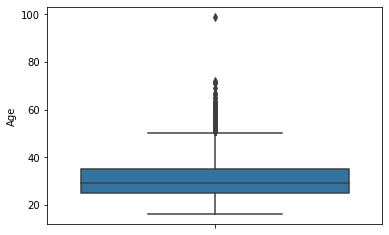

In [11]:
ax=sns.boxplot(data=df, y='Age')

Plot a histogram of the column `Age`.


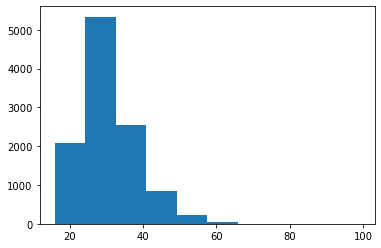

In [12]:
plt.hist(df['Age'])
plt.show()

## 2. Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

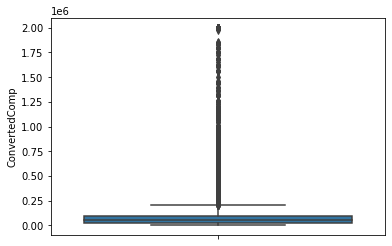

In [13]:
sns.boxplot(data=df, y='ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
df['ConvertedComp'].isna().sum()

816

In [15]:
Q3_ConvertedComp=df['ConvertedComp'].quantile(0.75)
Q1_ConvertedComp=df['ConvertedComp'].quantile(0.25)
IQR_ConvertedComp=Q3_ConvertedComp-Q1_ConvertedComp
IQR_ConvertedComp

73132.0

Find out the upper and lower bounds.


In [16]:
upper_bound_ConvertedComp=min((Q3_ConvertedComp+(1.5*IQR_ConvertedComp)),df['ConvertedComp'].max())
lower_bound_ConvertedComp=max((Q1_ConvertedComp-(1.5*IQR_ConvertedComp)),df['ConvertedComp'].min())
print('upper bound =', upper_bound_ConvertedComp,'\nlower bound =', lower_bound_ConvertedComp)

upper bound = 209698.0 
lower bound = 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
outliers_ConvertedComp=[]
for items in df['ConvertedComp']:
    if (items>upper_bound_ConvertedComp) or (items<lower_bound_ConvertedComp):
        outliers_ConvertedComp.append(items)

len(outliers_ConvertedComp)

879

## 3. Dealing with outliers


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
print('no. of rows before removing outliers =', df.dropna(subset=['ConvertedComp']).shape[0])
new_df=df[(df['ConvertedComp']<=upper_bound_ConvertedComp) & (df['ConvertedComp']>=lower_bound_ConvertedComp)]
print('no. of rows after removing outliers =', new_df.shape[0])

no. of rows before removing outliers = 10582
no. of rows after removing outliers = 9703


## 4. Identifying Correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
new_df.corr()[['Age']]

,Age
Respondent,0.002180
CompTotal,0.006337
ConvertedComp,0.401821
WorkWeekHrs,0.032032
CodeRevHrs,-0.012878
Age,1.000000
